In [1]:
#importing libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,f_oneway,chi2_contingency,kruskal

In [2]:
#loading the data
walmart=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [3]:
walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


So in this data there is 550068 records and 10 columns including Purchase ammount.

In [5]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

So there is no Null values in the data

In [6]:
walmart['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

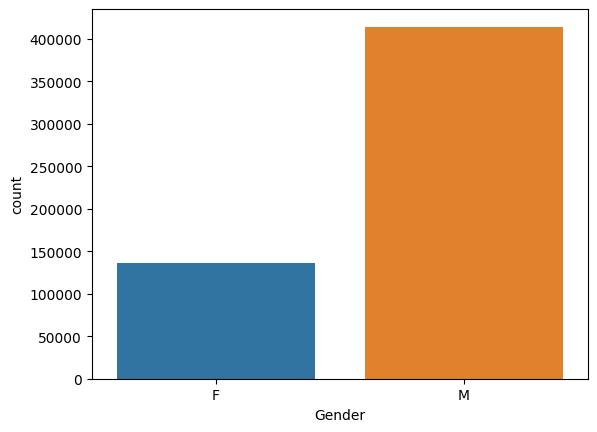

In [7]:
sns.countplot(data=walmart,x='Gender')

From the above analysis we can see the data is mostly dominated by male.

In [8]:
walmart['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

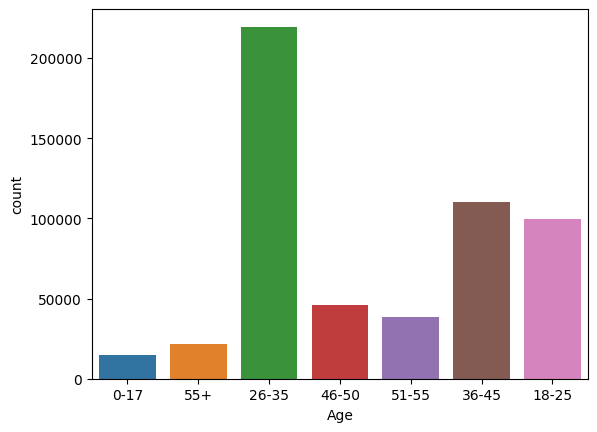

In [9]:
sns.countplot(data=walmart,x='Age')

From the above analysis we can see 26-35 age group is bigger than any other age group in this data.

In [10]:
walmart['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

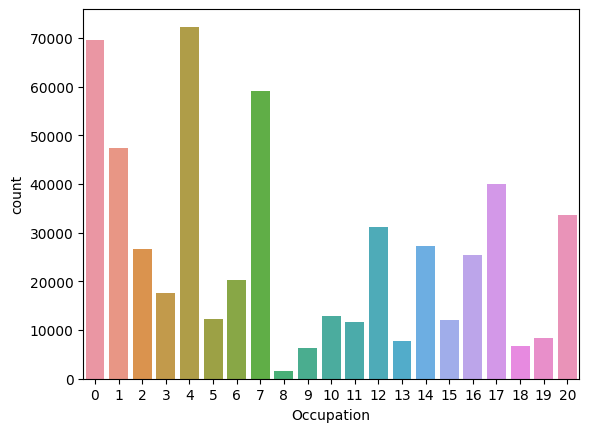

In [11]:
sns.countplot(data=walmart,x='Occupation')

In [12]:
walmart['Occupation'].describe()

count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

<Axes: ylabel='Occupation'>

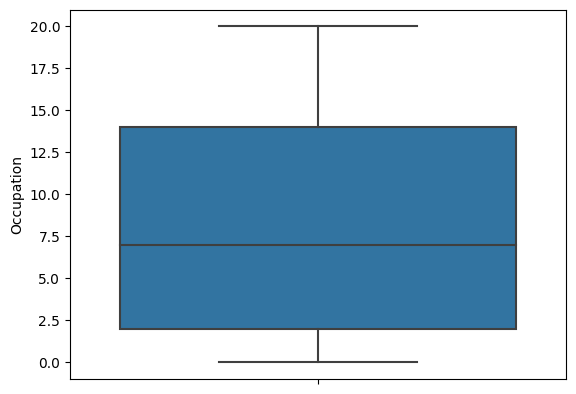

In [13]:
sns.boxplot(data=walmart,y='Occupation')

So occupation has no outlier.

In [14]:
walmart['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

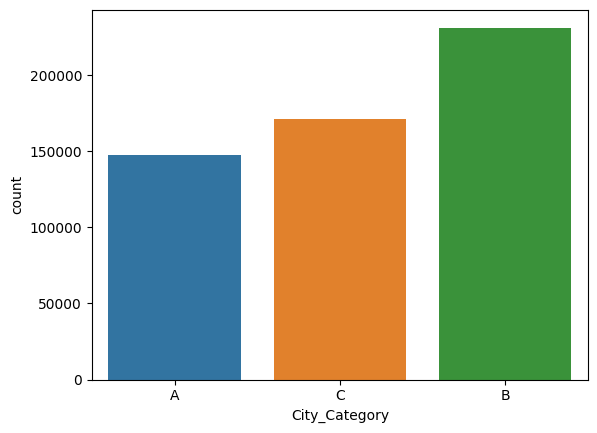

In [15]:
sns.countplot(data=walmart,x='City_Category')

From the above analysis we can see City B has more people than other city effect.

<Axes: xlabel='City_Category', ylabel='count'>

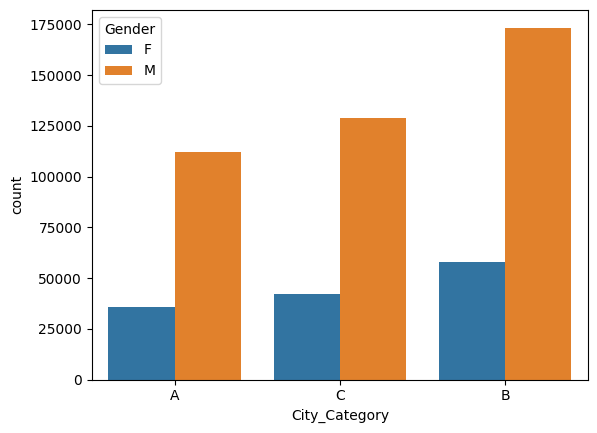

In [16]:
sns.countplot(data=walmart,x='City_Category',hue='Gender')

In [17]:
walmart['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

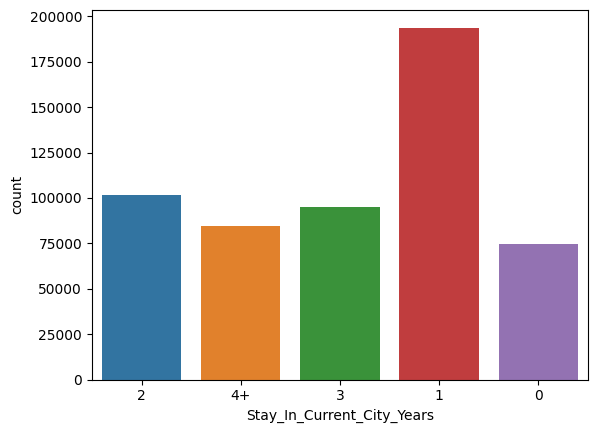

In [18]:
sns.countplot(data=walmart,x='Stay_In_Current_City_Years')

Here we can see most people stay in city for one year mostly

In [19]:
walmart['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

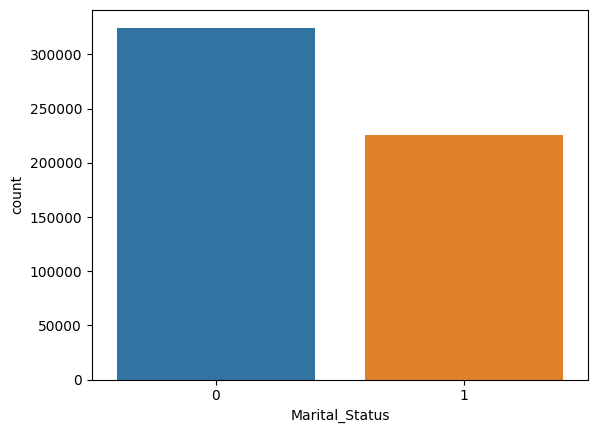

In [20]:
sns.countplot(data=walmart,x='Marital_Status')

We can see most customers are not married.

In [21]:
walmart['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

<Axes: xlabel='Product_Category', ylabel='count'>

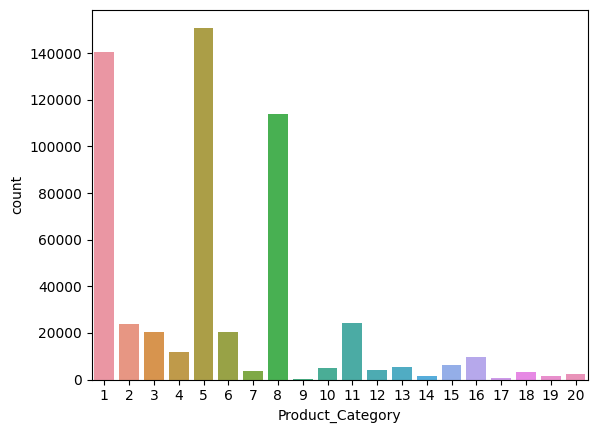

In [22]:
sns.countplot(data=walmart,x='Product_Category')

Here we can see product category 1,5 and 8 has most of the sales.

In [23]:
walmart['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [24]:
#calculating IQR
Purchase_quartiles = walmart['Purchase'].quantile([0.25, 0.75])
Purchase_iqr =Purchase_quartiles[0.75] - Purchase_quartiles[0.25]
print(Purchase_iqr)

6231.0


In [25]:
#finding outliers
Purchase_outliers=walmart[(walmart['Purchase']>Purchase_quartiles[0.75]+Purchase_iqr*1.5) | (walmart['Purchase']<Purchase_quartiles[0.25]-Purchase_iqr*1.5)]
len(Purchase_outliers)

2677

<Axes: ylabel='Purchase'>

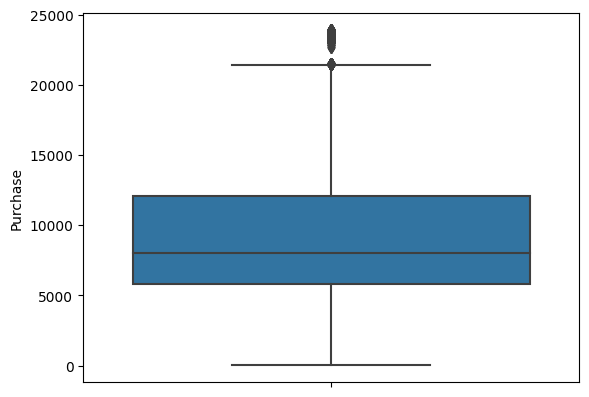

In [26]:
sns.boxplot(data=walmart,y='Purchase')

<Axes: xlabel='Gender', ylabel='Purchase'>

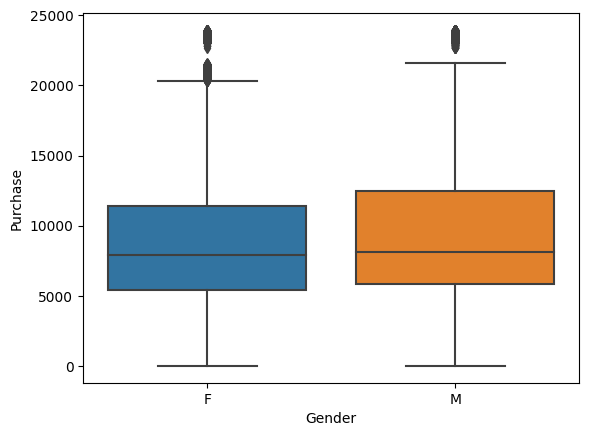

In [27]:
sns.boxplot(data=walmart,y='Purchase',x='Gender')

Here we can see for both male and female there is outlier in Purchase value

<h1>Now lets analyse the imapct of Gender on Purchase <h1>

In [28]:
walmart_male=walmart[walmart['Gender']=='M']
walmart_female=walmart[walmart['Gender']=='F']

In [29]:
walmart_male['Purchase'].describe()

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64

In [30]:
walmart_female['Purchase'].describe()

count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64

From the above analysis ,Female mean purchase ammount less than Male mean purchase ammount. But this does not indiactre males spends more. We need to test that statistically

lets explore confidence interval for male purchase vs female purchase

In [31]:
male_purchase_mean=[]
sample_size=36
for i in range(10000):
  walmart_male_sample=walmart_male.sample(n=sample_size)
  male_purchase_sample_mean=walmart_male_sample['Purchase'].mean()
  male_purchase_mean.append(male_purchase_sample_mean)
mean_sample_mean=np.mean(male_purchase_mean)
print('mean of smaple means:' ,mean_sample_mean)
standered_error=np.std(male_purchase_mean)
print('standered error:' ,standered_error)
population_std=standered_error*np.sqrt(sample_size)
print('Population standered deviation: ',population_std)

mean of smaple means: 9429.053683333334
standered error: 853.0891231418225
Population standered deviation:  5118.534738850934


In [32]:
print('With 95% percent confidence interval, the mean of purchase ammount for male lies between : [', mean_sample_mean-1.96*standered_error,mean_sample_mean+1.96*standered_error,' ]')

With 95% percent confidence interval, the mean of purchase ammount for male lies between : [ 7756.999001975361 11101.108364691305  ]


<Axes: ylabel='Count'>

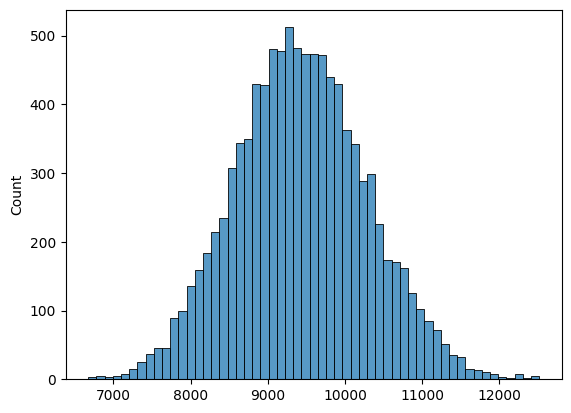

In [33]:
sns.histplot(data=male_purchase_mean)

In [34]:
female_purchase_mean=[]
sample_size=36
for i in range(10000):
  walmart_female_sample=walmart_female.sample(n=sample_size)
  female_purchase_sample_mean=walmart_female_sample['Purchase'].mean()
  female_purchase_mean.append(female_purchase_sample_mean)
mean_sample_mean=np.mean(female_purchase_mean)
print('mean of smaple means:' ,mean_sample_mean)
standered_error=np.std(female_purchase_mean)
print('standered error:' ,standered_error)
population_std=standered_error*np.sqrt(sample_size)
print('Population standered deviation: ',population_std)

mean of smaple means: 8726.522541666665
standered error: 795.5518536699873
Population standered deviation:  4773.3111220199235


In [35]:
print('With 95% percent confidence interval, the femean of purchase ammount for male lies between : [', mean_sample_mean-1.96*standered_error,mean_sample_mean+1.96*standered_error,' ]')

With 95% percent confidence interval, the femean of purchase ammount for male lies between : [ 7167.24090847349 10285.80417485984  ]


<Axes: ylabel='Count'>

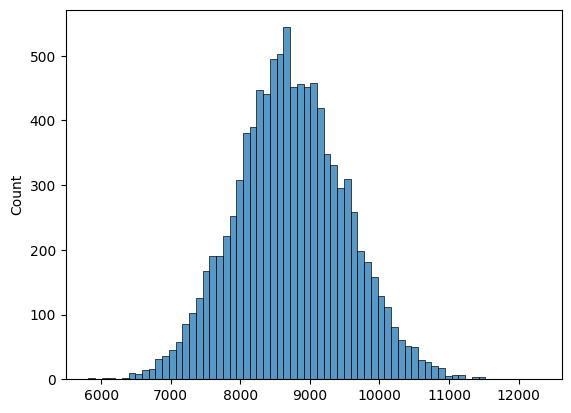

In [36]:
sns.histplot(data=female_purchase_mean)

From the above analysis we can see For Male and Female purchase interval is allmost similar.

<h3>let explore statistical testing<BR></h3>
Null hypothysis H0: Gender have no impact on purchase behaviour<br>
Alternate hypothysis H1: Gender impacts on purchase behaviour<br>

In [37]:
#ttest on purchase of men vs women
stat,prob=ttest_ind(walmart_male['Purchase'],walmart_female['Purchase'])
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Gender impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Gender have no impact on purchase behaviour")

44.837957934353966 0.0
Reject H0. i.e. Gender impacts purchase behaviour


So from the above testing we can say Gender Has impact on Purchase behaviour  with 95% confidence.<br> Now lets explore which Gender has higer Purchase tendency.

<h3>let explore statistical testing<br></h3>
 H0: Male purchase ammount is not more than female<br>
 H1: Male purchase ammount more than female

In [38]:
#ttest on purchase of men vs women
stat,prob=ttest_ind(walmart_male['Purchase'],walmart_female['Purchase'],alternative='greater')
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Male purchase ammount is more than female")
else:
  print("Can not reject H0. i.e. Male purchase ammount is not more than female")

44.837957934353966 0.0
Reject H0. i.e. Male purchase ammount is more than female


So from the ttest we can say Male Purchase more than Female purchase with 95% confidence

<h3>let explore statistical testing<br></h3>
 H0: Female purchase ammount is not more than male<br>
 H1: Female purchase ammount more than male


In [39]:
#ttest on purchase of men vs women
stat,prob=ttest_ind(walmart_male['Purchase'],walmart_female['Purchase'],alternative='less')
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Female purchase ammount is more than male")
else:
  print("Can not reject H0. i.e. Female purchase ammount is not more than male")

44.837957934353966 1.0
Can not reject H0. i.e. Female purchase ammount is not more than male


So From the above testing we can conclude with 95% percent confidence that Male purchase more than Female purchase and Female customers on an average do not spend more than Male

<h1>Now lets analyse the imapct of Marital_Status on Purchase <h1>

In [40]:
walmart_married=walmart[walmart['Marital_Status']==1]
walmart_not_married=walmart[walmart['Marital_Status']==0]

In [41]:
walmart_married['Purchase'].describe()

count    225337.000000
mean       9261.174574
std        5016.897378
min          12.000000
25%        5843.000000
50%        8051.000000
75%       12042.000000
max       23961.000000
Name: Purchase, dtype: float64

In [42]:
walmart_not_married['Purchase'].describe()

count    324731.000000
mean       9265.907619
std        5027.347859
min          12.000000
25%        5605.000000
50%        8044.000000
75%       12061.000000
max       23961.000000
Name: Purchase, dtype: float64

From The above analysis we can see mean purchase ammount for both married and not married people has all most same mean. But we can not conlude the same we have to do some statistical testing

In [43]:
married_purchase_mean=[]
sample_size=36
for i in range(10000):
  walmart_married_sample=walmart_married.sample(n=sample_size)
  married_purchase_sample_mean=walmart_married_sample['Purchase'].mean()
  married_purchase_mean.append(married_purchase_sample_mean)
mean_sample_mean=np.mean(married_purchase_mean)
print('mean of smaple means:' ,mean_sample_mean)
standered_error=np.std(married_purchase_mean)
print('standered error:' ,standered_error)
population_std=standered_error*np.sqrt(sample_size)
print('Population standered deviation: ',population_std)

mean of smaple means: 9264.968183333334
standered error: 836.2478681761838
Population standered deviation:  5017.4872090571025


In [44]:
print('With 95% percent confidence interval, the mean of purchase ammount for married lies between : [', mean_sample_mean-1.96*standered_error,mean_sample_mean+1.96*standered_error,' ]')

With 95% percent confidence interval, the mean of purchase ammount for married lies between : [ 7625.922361708014 10904.014004958655  ]


<Axes: ylabel='Count'>

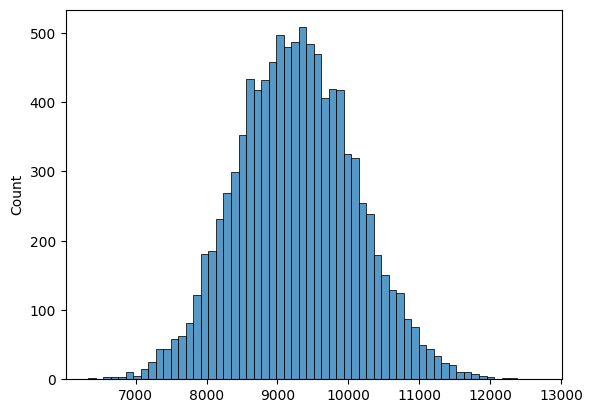

In [45]:
sns.histplot(data=married_purchase_mean)

In [46]:
not_married_purchase_mean=[]
sample_size=36
for i in range(10000):
  walmart_not_married_sample=walmart_not_married.sample(n=sample_size)
  not_married_purchase_sample_mean=walmart_not_married_sample['Purchase'].mean()
  not_married_purchase_mean.append(not_married_purchase_sample_mean)
mean_sample_mean=np.mean(not_married_purchase_mean)
print('mean of smaple means:' ,mean_sample_mean)
standered_error=np.std(not_married_purchase_mean)
print('standered error:' ,standered_error)
population_std=standered_error*np.sqrt(sample_size)
print('Population standered deviation: ',population_std)

mean of smaple means: 9264.966038888888
standered error: 838.4956901834444
Population standered deviation:  5030.974141100666


In [47]:
print('With 95% percent confidence interval, the mean of purchase ammount for not married lies between : [', mean_sample_mean-1.96*standered_error,mean_sample_mean+1.96*standered_error,' ]')

With 95% percent confidence interval, the mean of purchase ammount for not married lies between : [ 7621.5144861293375 10908.417591648438  ]


<Axes: ylabel='Count'>

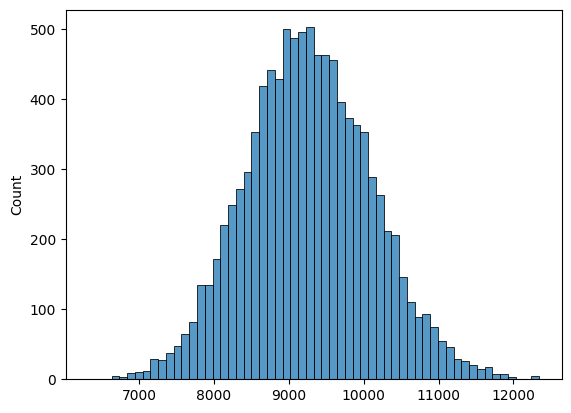

In [48]:
sns.histplot(data=not_married_purchase_mean)

From the above analysis we can see both married and not married people has same confidence interval. So from this analysis we colud not conclude any thing.

<h3>let explore statistical testing <br></h3>
H0: Marital_Status have no impact on purchase behaviour <br>
H1: Marital_Status impacts on purchase behaviour

In [49]:
#ttest on purchase of married vs not married
stat,prob=ttest_ind(walmart_male['Purchase'],walmart_female['Purchase'],alternative='less')
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Marital_Status impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Marital_Status have no impact on purchase behaviour")

44.837957934353966 1.0
Can not reject H0. i.e. Marital_Status have no impact on purchase behaviour


From the above analysis we can see Marital_Status has no impact on purchase behaviour with 95% confidence.

<h1> Lets analyse impcat of Age on purchase behaviour</h1>

<Axes: xlabel='Purchase', ylabel='Count'>

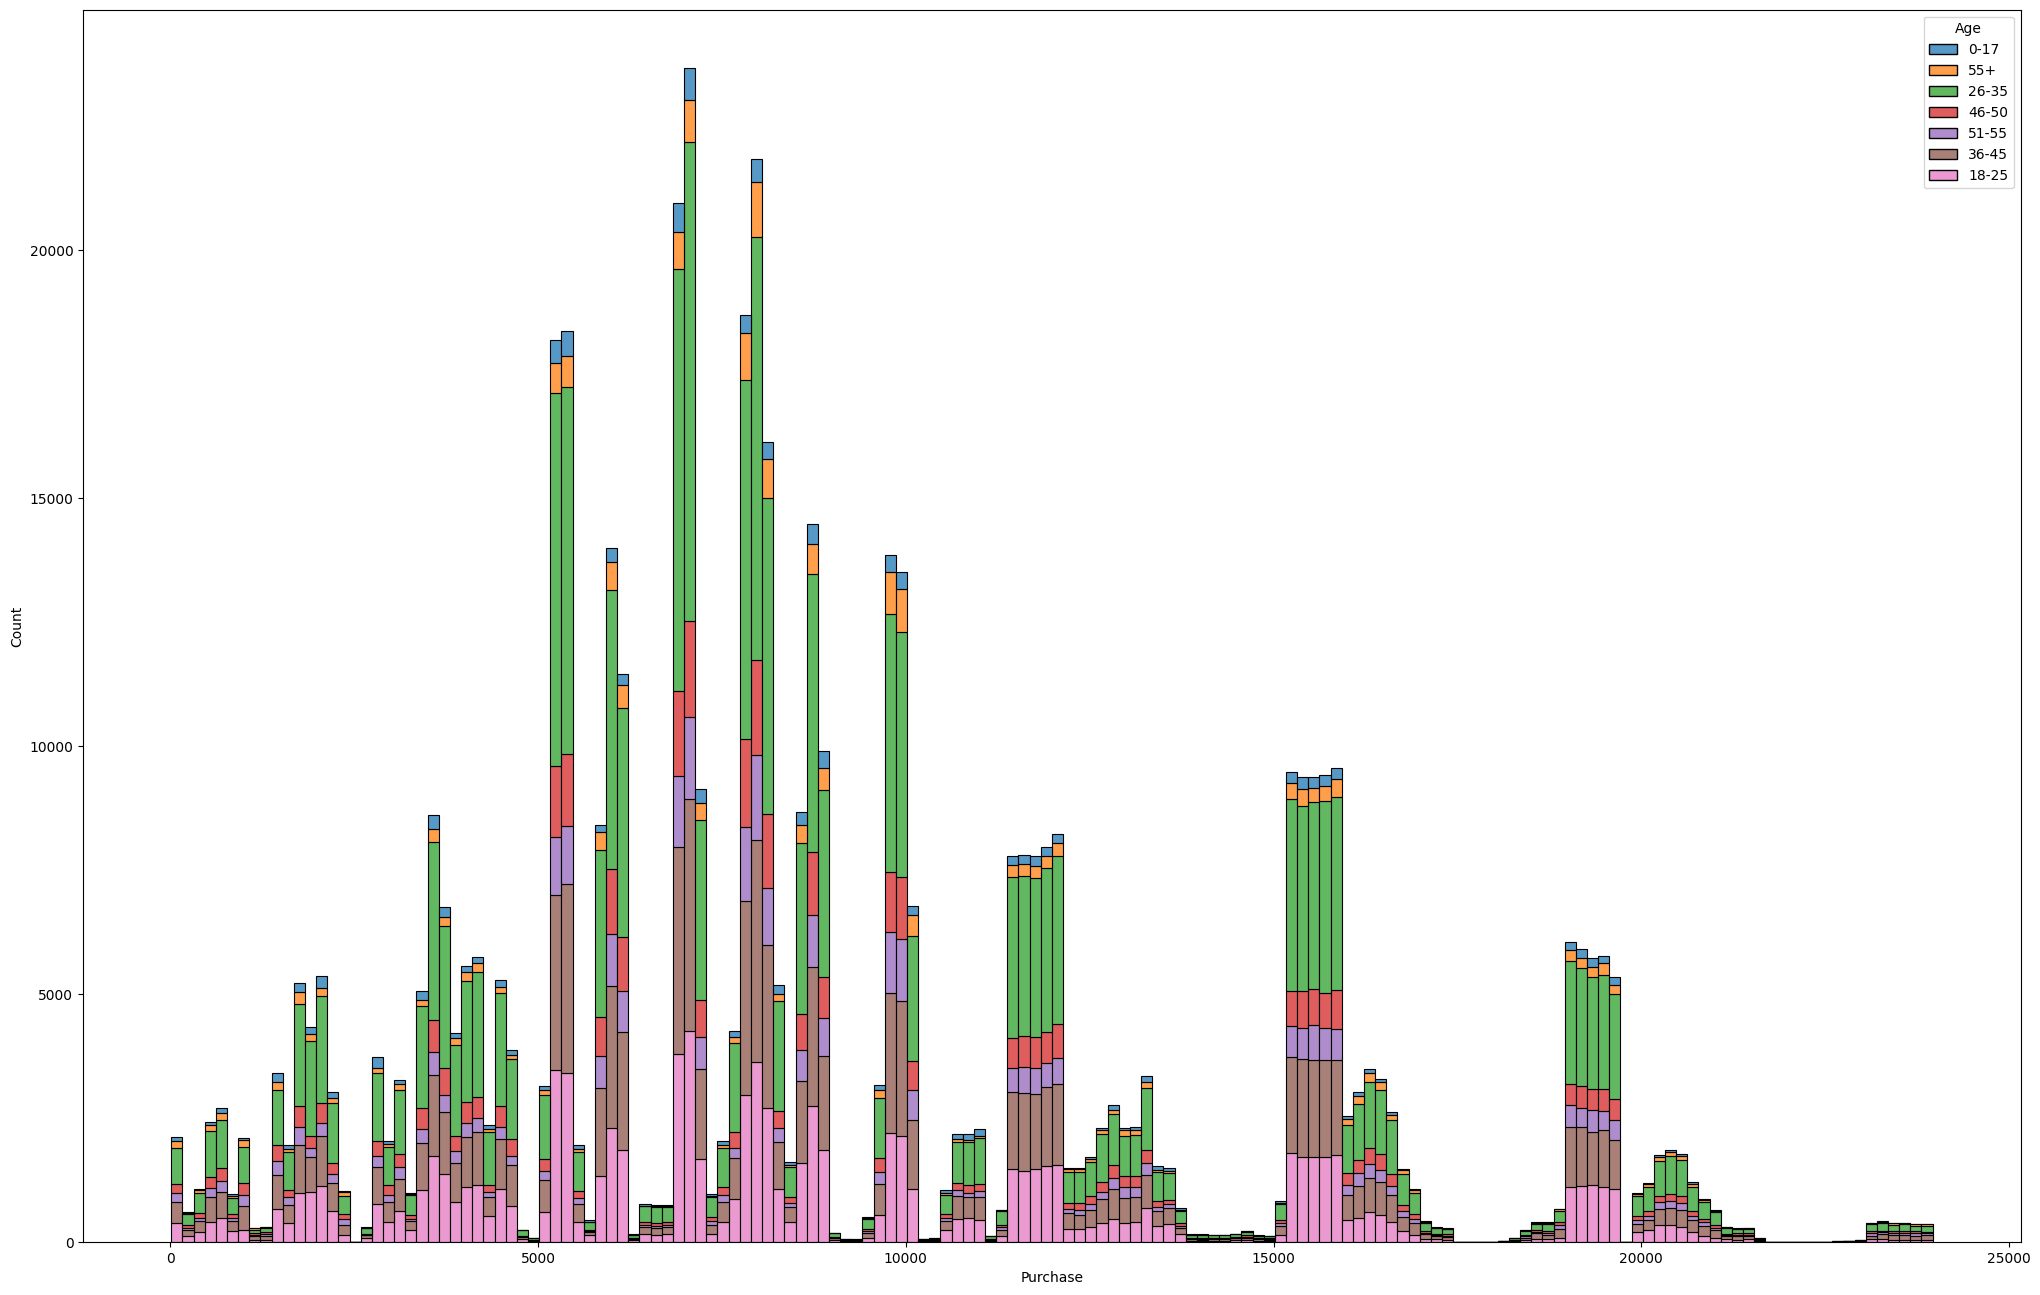

In [50]:
plt.figure(figsize=(25,16))
sns.histplot(data=walmart,x='Purchase',hue='Age',multiple='stack')

From the above chart we can not conclude any result. Let do some statistical testing.

In [51]:
walmart_by_age=walmart.groupby('Age')
avg_age_walmart=walmart_by_age['Purchase'].mean().reset_index().rename(columns={'Purchase':'Mean_purchase'})
avg_age_walmart

,Age,Mean_purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


In [52]:
std_age_walmart=walmart_by_age['Purchase'].std().reset_index().rename(columns={'Purchase':'std_purchase'})
std_age_walmart

,Age,std_purchase
0,0-17,5111.114046
1,18-25,5034.321997
2,26-35,5010.527303
3,36-45,5022.923879
4,46-50,4967.216367
5,51-55,5087.368080
6,55+,5011.493996


<Axes: xlabel='Age', ylabel='Mean_purchase'>

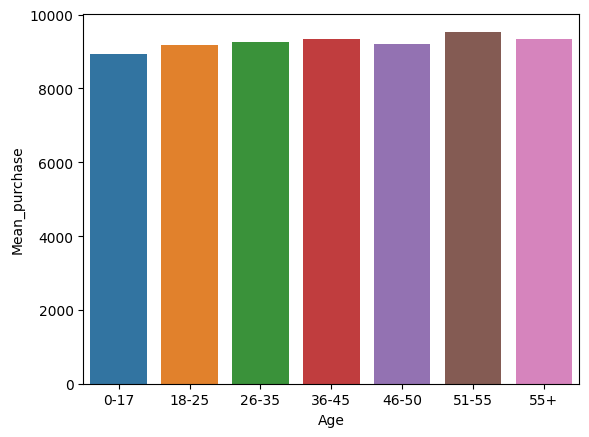

In [53]:
sns.barplot(data=avg_age_walmart,x='Age',y='Mean_purchase')

From the above analysis we can see all most all age group has same mean so we can no conclude about impact of age in purchase other than 0-17 year age group.

In [54]:
walmart_0_17 = walmart_by_age['Purchase'].get_group('0-17')
walmart_18_25=walmart_by_age['Purchase'].get_group('18-25')
walmart_26_35=walmart_by_age['Purchase'].get_group('26-35')
walmart_36_45=walmart_by_age['Purchase'].get_group('36-45')
walmart_46_50=walmart_by_age['Purchase'].get_group('46-50')
walmart_51_55=walmart_by_age['Purchase'].get_group('51-55')
walmart_55_and_more=walmart_by_age['Purchase'].get_group('55+')

<h1>let explore statistical testing<br></h1>
H0: Age have no impact on purchase behaviour<br>
H1: Age impacts on purchase behaviour<br>

In [55]:
#anova test on purchase of various Age groups
stat,prob=f_oneway(walmart_0_17,walmart_18_25,walmart_26_35,walmart_36_45,walmart_46_50,walmart_51_55,walmart_55_and_more)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Age impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Age have no impact on purchase behaviour")

40.57579909450407 1.053563939251671e-49
Reject H0. i.e. Age impacts purchase behaviour


In [56]:
#kruskal test on purchase of various Age groups
stat,prob=kruskal(walmart_0_17,walmart_18_25,walmart_26_35,walmart_36_45,walmart_46_50,walmart_51_55,walmart_55_and_more)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Age impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Age have no impact on purchase behaviour")

315.65242682849174 3.612251655399266e-65
Reject H0. i.e. Age impacts purchase behaviour


So here we can see age has impact on purchase behaviour with 95% confidence.

<h3>Lets do the same analysis without 0-17 age group</h3>


In [57]:
#kruskal test on purchase of various Age groups
stat,prob=kruskal(walmart_18_25,walmart_26_35,walmart_36_45,walmart_46_50,walmart_51_55,walmart_55_and_more)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Age impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Age have no impact on purchase behaviour")

245.5960985493636 4.840942364177889e-51
Reject H0. i.e. Age impacts purchase behaviour


So here we can see rest of age group also has impact on purchase behaviour with 95% confidence.

<h1> Lets analyse impcat of Stay_In_Current_City_Years on purchase behaviour</h1>

<Axes: xlabel='Purchase', ylabel='Count'>

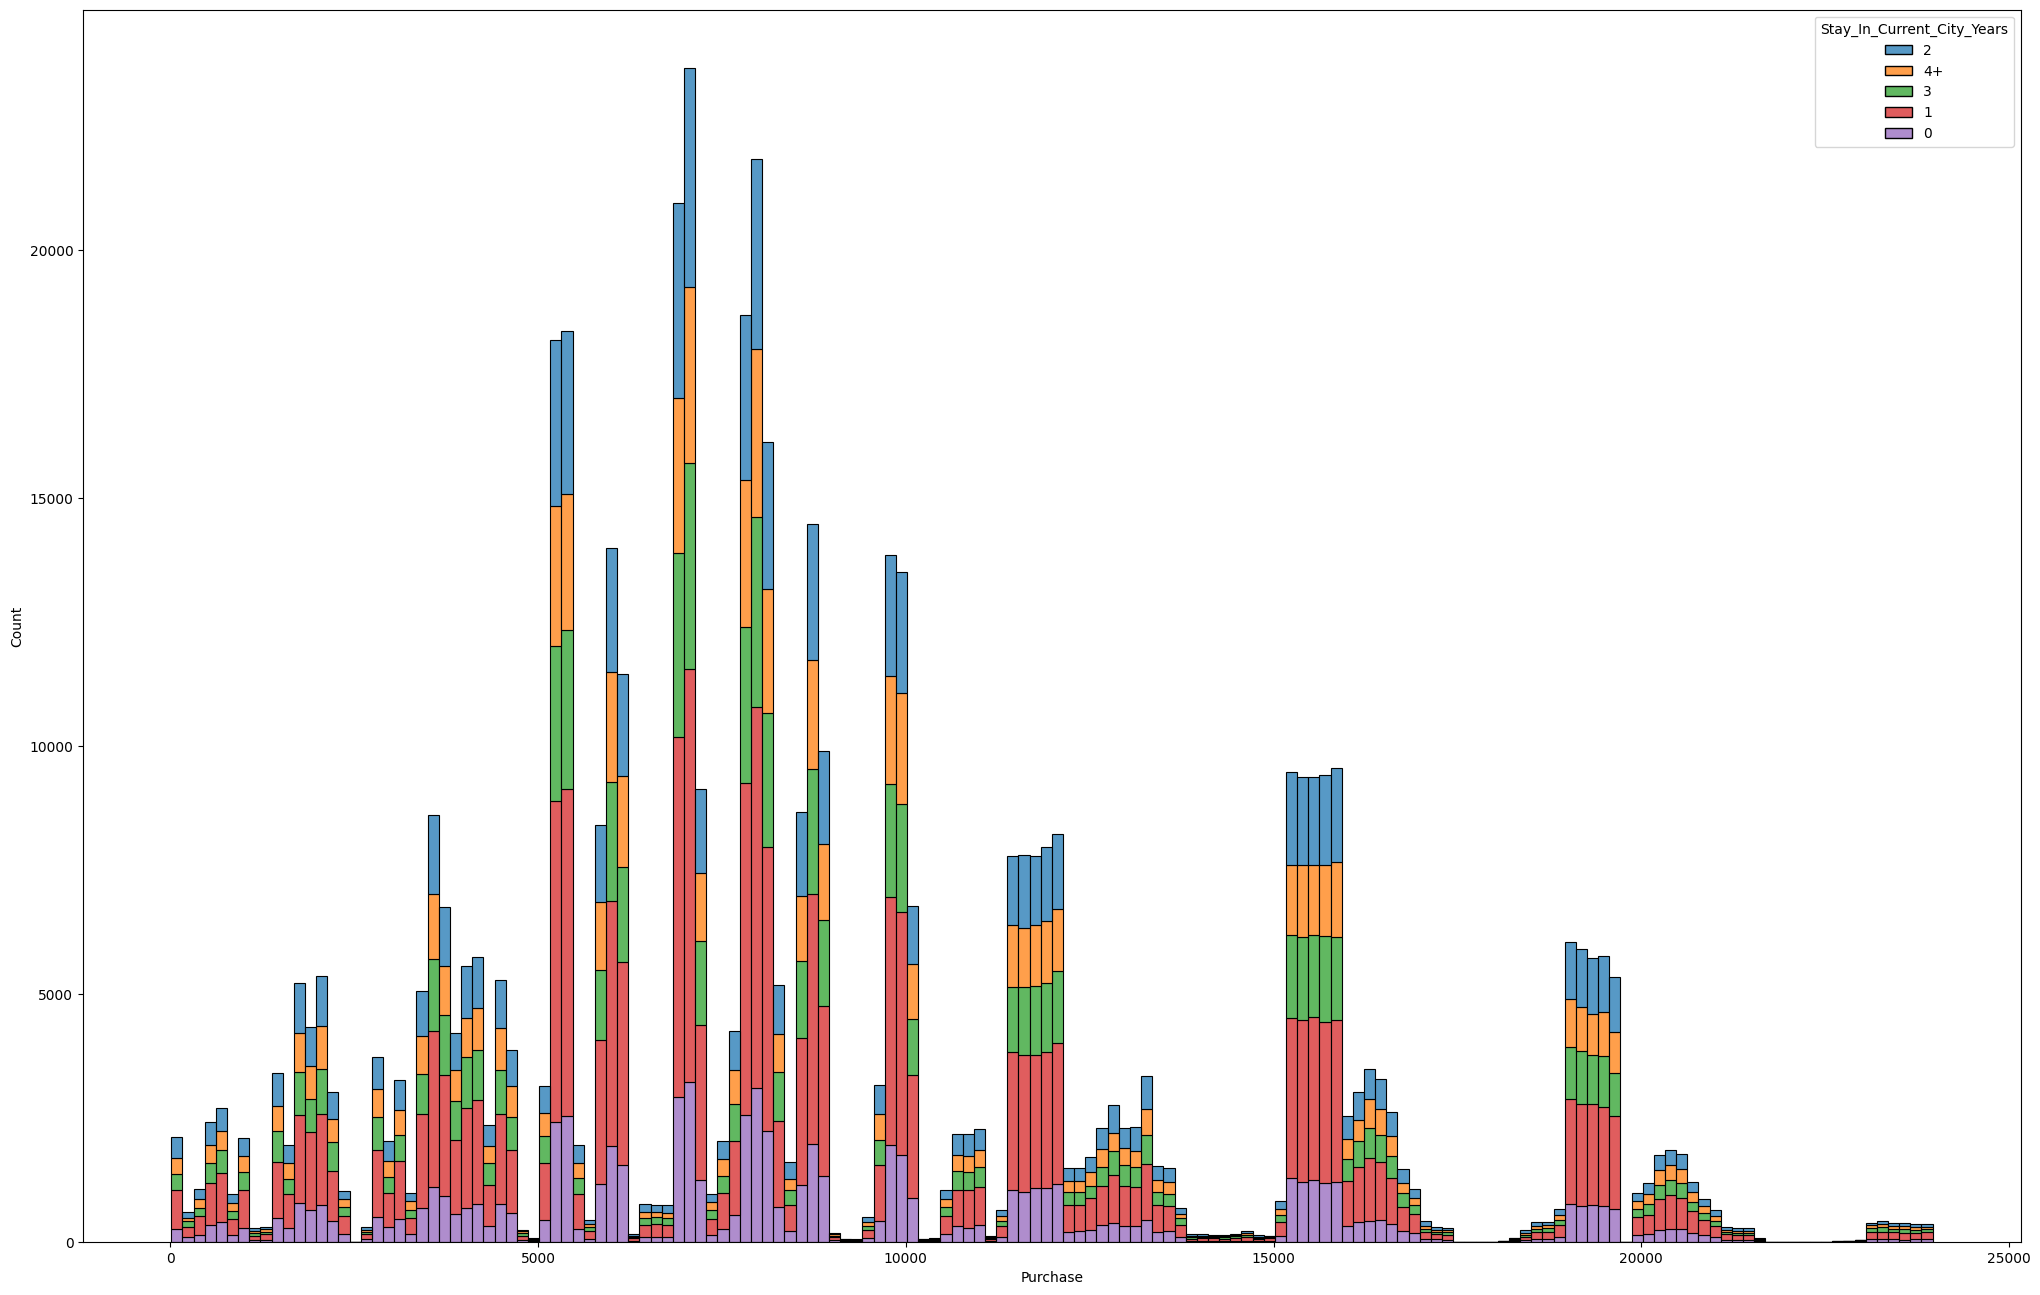

In [58]:
plt.figure(figsize=(25,16))
sns.histplot(data=walmart,x='Purchase',hue='Stay_In_Current_City_Years',multiple='stack')

In [59]:
walmart_by_Stay_In_Current_City_Years=walmart.groupby('Stay_In_Current_City_Years')
avg_Stay_In_Current_City_Years_walmart=walmart_by_Stay_In_Current_City_Years['Purchase'].mean().reset_index().rename(columns={'Purchase':'Mean_purchase'})
avg_Stay_In_Current_City_Years_walmart

,Stay_In_Current_City_Years,Mean_purchase
0,0,9180.075123
1,1,9250.145923
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872


In [60]:
std_Stay_In_Current_City_Years_walmart=walmart_by_Stay_In_Current_City_Years['Purchase'].std().reset_index().rename(columns={'Purchase':'std_purchase'})
std_Stay_In_Current_City_Years_walmart

,Stay_In_Current_City_Years,std_purchase
0,0,4990.479940
1,1,5027.476933
2,2,5044.588224
3,3,5020.343541
4,4+,5017.627594


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Mean_purchase'>

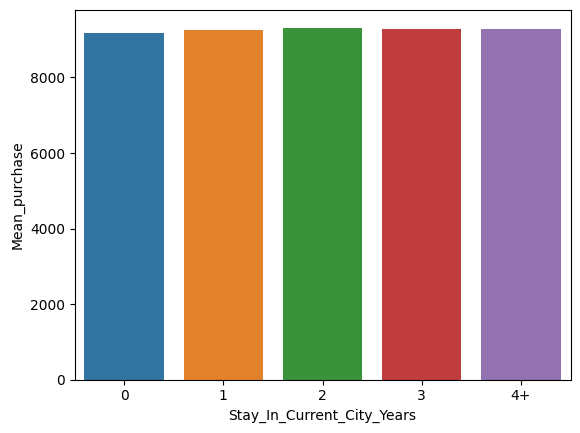

In [61]:
sns.barplot(data=avg_Stay_In_Current_City_Years_walmart,x='Stay_In_Current_City_Years',y='Mean_purchase')

So from the above chart we can say all group of Stay_In_Current_City_Years have all most same mean of purchase

In [62]:
walmart_stay_0=walmart_by_Stay_In_Current_City_Years['Purchase'].get_group('0')
walmart_stay_1=walmart_by_Stay_In_Current_City_Years['Purchase'].get_group('1')
walmart_stay_2=walmart_by_Stay_In_Current_City_Years['Purchase'].get_group('2')
walmart_stay_3=walmart_by_Stay_In_Current_City_Years['Purchase'].get_group('3')
walmart_stay_4_and_more=walmart_by_Stay_In_Current_City_Years['Purchase'].get_group('4+')

<h1>let explore statistical testing<br></h1>
H0: Stay_In_Current_City_Years have no impact on purchase behaviour<br>
H1: Stay_In_Current_City_Years impacts on purchase behaviour<br>

In [63]:
#anova test on purchase of various Stay_In_Current_City_Years groups
stat,prob=f_oneway(walmart_stay_0,walmart_stay_1,walmart_stay_2,walmart_stay_3,walmart_stay_4_and_more)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Stay_In_Current_City_Years impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Stay_In_Current_City_Years have no impact on purchase behaviour")

9.382655346642094 1.4011435777855407e-07
Reject H0. i.e. Stay_In_Current_City_Years impacts purchase behaviour


In [64]:
#kruskal test on purchase of various Stay_In_Current_City_Years groups
stat,prob=kruskal(walmart_stay_0,walmart_stay_1,walmart_stay_2,walmart_stay_3,walmart_stay_4_and_more)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. Stay_In_Current_City_Years impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. Stay_In_Current_City_Years have no impact on purchase behaviour")

34.097451171038564 7.116707175121927e-07
Reject H0. i.e. Stay_In_Current_City_Years impacts purchase behaviour


From both of the test we can see Stay_In_Current_City_Years has impact on Purchase behaviour with 95% confidence.

<h1> Lets analyse impcat of City_Category on purchase behaviour</h1>

<Axes: xlabel='Purchase', ylabel='Count'>

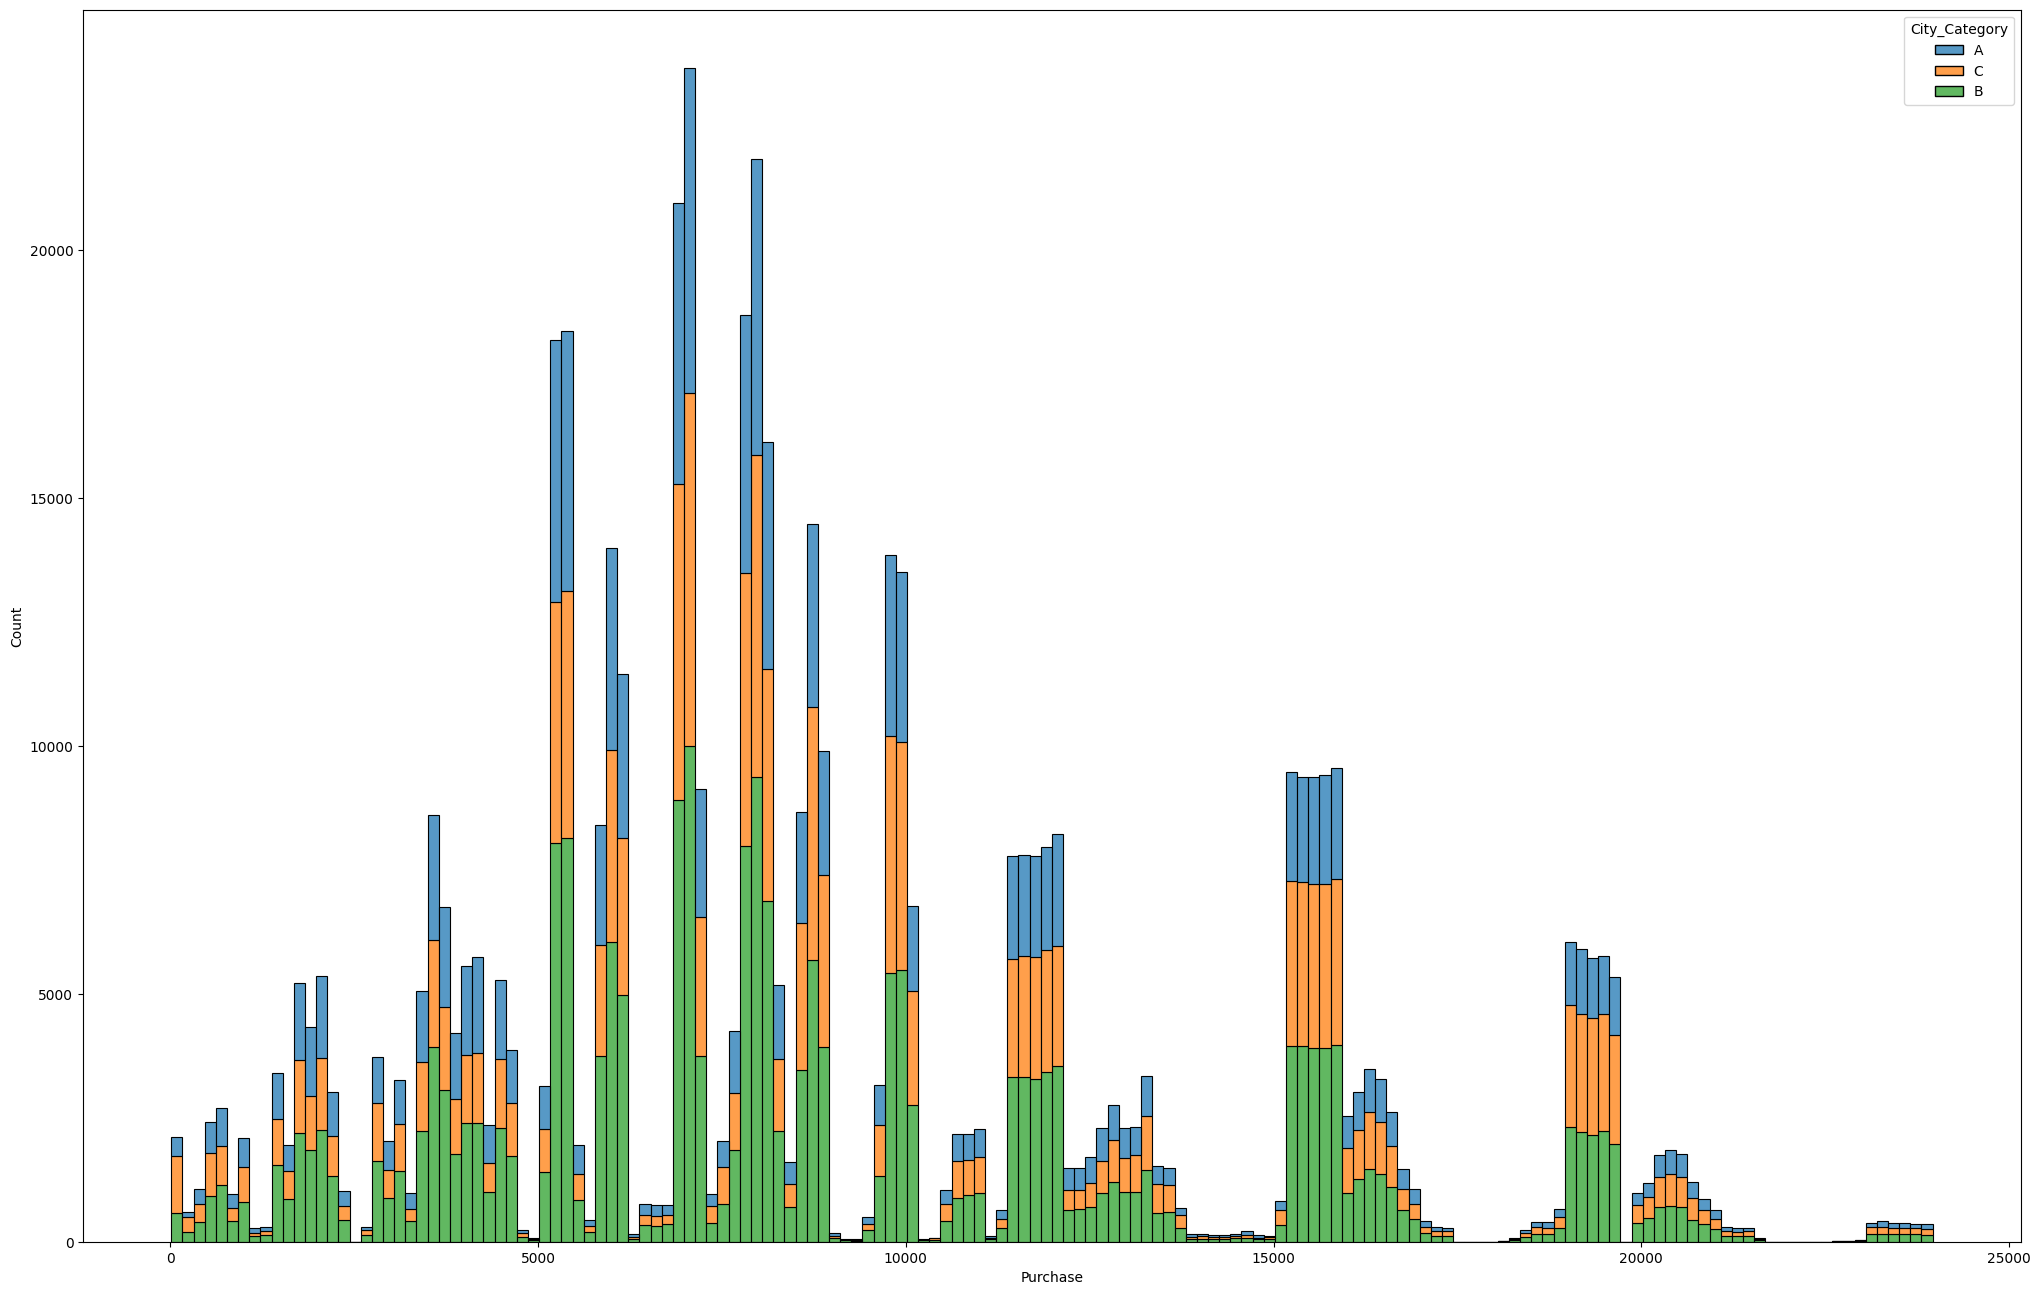

In [65]:
plt.figure(figsize=(25,16))
sns.histplot(data=walmart,x='Purchase',hue='City_Category',multiple='stack')

In [66]:
walmart_by_City_Category=walmart.groupby('City_Category')
avg_City_Category_walmart=walmart_by_City_Category['Purchase'].mean().reset_index().rename(columns={'Purchase':'Mean_purchase'})
avg_City_Category_walmart

,City_Category,Mean_purchase
0,A,8911.939216
1,B,9151.300563
2,C,9719.920993


In [67]:
std_City_Category_walmart=walmart_by_City_Category['Purchase'].std().reset_index().rename(columns={'Purchase':'std_purchase'})
std_City_Category_walmart

,City_Category,std_purchase
0,A,4892.115238
1,B,4955.496566
2,C,5189.465121


<Axes: xlabel='City_Category', ylabel='Mean_purchase'>

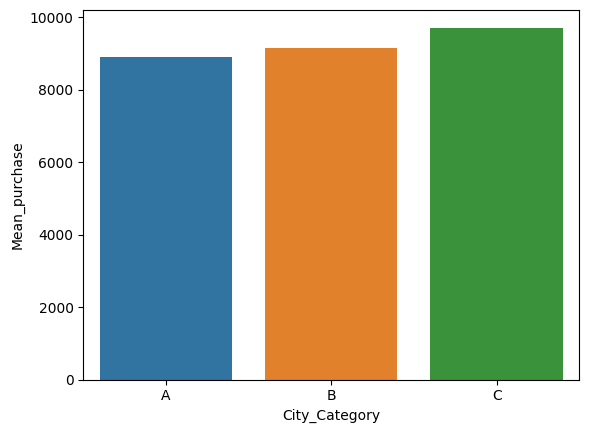

In [68]:
sns.barplot(data=avg_City_Category_walmart,x='City_Category',y='Mean_purchase')

From the above analysis we can see city category A has comparatively less mean purchase value whereas city category C has highest mean purchase value. But we need to justify our finding by some statistical testing

In [69]:
walmart_city_A=walmart_by_City_Category['Purchase'].get_group('A')
walmart_city_B=walmart_by_City_Category['Purchase'].get_group('B')
walmart_city_C=walmart_by_City_Category['Purchase'].get_group('C')

<h1>let explore statistical testing<br></h1>
H0: City_Category have no impact on purchase behaviour<br>
H1: City_Category impacts on purchase behaviour<br>

In [70]:
#anova test on purchase of various Stay_In_Current_City_Years groups
stat,prob=f_oneway(walmart_city_A,walmart_city_B,walmart_city_C)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. City_Category impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. City_Category have no impact on purchase behaviour")

1130.7459610102974 0.0
Reject H0. i.e. City_Category impacts purchase behaviour


In [71]:
#kruskal test on purchase of various Stay_In_Current_City_Years groups
stat,prob=kruskal(walmart_city_A,walmart_city_B,walmart_city_C)
print(stat,prob)
if prob <0.05:
  print("Reject H0. i.e. City_Category impacts purchase behaviour")
else:
  print("Can not reject H0. i.e. City_Category have no impact on purchase behaviour")

2303.7127322648357 0.0
Reject H0. i.e. City_Category impacts purchase behaviour


So from the above analysis we can see City_Category impacts the purchase behaviour with 95% confidence.

<h1>Final Insights</h1>



1.   With 95% percent confidence interval, the mean of purchase ammount for male lies between : [ 7756.999001975361 11101.108364691305  ]
2.   With 95% percent confidence interval, the femean of purchase ammount for male lies between : [ 7167.24090847349 10285.80417485984  ]
3. With 95% percent confidence that Male purchase more than Female purchase and Female customers on an average do not spend more than Male.
4. With 95% percent confidence interval, the mean of purchase ammount for married lies between : [ 7625.922361708014 10904.014004958655  ]
5. With 95% percent confidence interval, the mean of purchase ammount for not married lies between : [ 7621.5144861293375 10908.417591648438  ]
6. Marital_Status has no impact on purchase behaviour with 95% confidence.
Age has impact on purchase behaviour with 95% confidence.
7. Age has impact on Purchase behaviour with 95% confidence.
8. Stay_In_Current_City_Years has impact on Purchase behaviour with 95% confidence.
9. City_Category impacts the purchase behaviour with 95% confidence.




<h1>Recommendations</h1>



1.   For Male and Female customers purchase mean interval is very overlaping so offer Male and Female customer same range of product and no need to offer different product to different genders, though men do purchase more.
2.   For both married and unmarried people have very overlaping interval of purchase mean. So offer same range of product to married and not married people.
3. Offer differnet range of product to differnet age group
4. Offer differnet range of product to differnet City_Category



